# Linear Regression
As you may have seen in the notes computation of linear. In the notes we used the useful `sklearn` library with its `LinearRegression` class. To build your own understanding we are going to implement our own version of this class. 

## Imports
Below are some useful imports that you find in many projects. Make sure that you are fairly acquainted with `pandas`, `numpy`, and `matplotlib` as these are fairly commonly used libraries in most neural network code.

In [1]:
# Avoid touching these
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray # Numpy Array Type Signature
import pandas as pd
from typing import Tuple

While we'll go into it more details related to creating datasets later  below is some simple code that loads from the csv file. If you want to experiment with different features be sure to change the value used for the x-axis. To visualise what the data looks like we can use the `head` function, as seen below.

In [2]:
# Get the data from the csv file
data = pd.read_csv('data/insurance.csv')
x = data["age"].to_numpy()
y = data["charges"].to_numpy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Plotting Helper
To simplify this task provided is a basic function to plot a graph using matplotlib.

In [3]:
# Helper function to plot graphs
def plot_graph(x, y, w, b):
    plt.plot(x, w * x + b, label='Your Model', color='red')
    plt.scatter(x, y, label='Data', color='blue')
    plt.xlabel('Age')
    plt.ylabel('Cost')
    plt.legend()
    plt.title('Effects of Age on Insurance Costs')
    plt.show()

## **(Question 1)** Analytic Methods & Least Squares 
A basic approach to solving linear regression, as seen in the notes, is an analytic method such as **least squares**. This finds the weight and bias given the x and y axis.

**Implement least squares by filling in the function definition.**

<details>
  <summary>Formula Hint</summary>
  Least square error can be computed with the equation:
  $$w = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$
    $$\beta = \bar{y} - w\bar{x}$$
</details>

In [4]:
def least_squares(x: NDArray, y: NDArray) -> Tuple[float, float]:
    """
    Function to calculate the weight and biases using least squares
    Args:
        x: X-axis
        y: Y-Axis
    Params:
        Tuple representing the weight and bias
    """
    # Calculate the mean of the x and y values
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the numerator and denominator of the slope
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
 
    # Calculate the slope and intercept
    w = numerator / denominator
    b = y_mean - w * x_mean

    return w, b

Once you've finish writing the function be sure to run the code below.

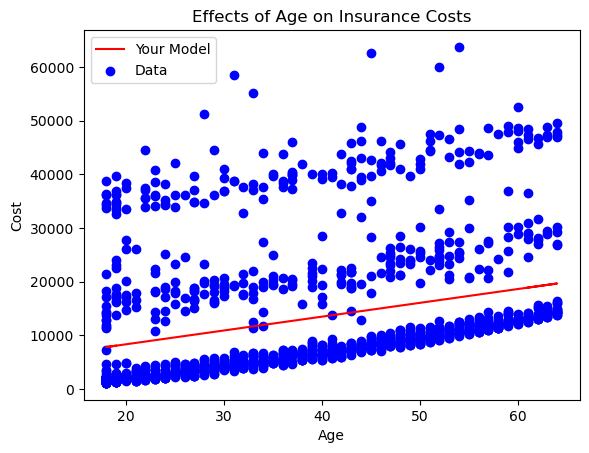

Weight: 257.7226186668955 Bias: 3165.885006063025


In [5]:
weight, bias = least_squares(x, y)
plot_graph(x, y, weight, bias)
print(f'Weight: {weight} Bias: {bias}')

## **(Question 2)** Regression & Gradient Descent
While for smaller datasets your above result may prove good enough, for larger datasets or ones with a different loss function a more generalised approach may be desired. Gradient descent is one such approach. It functions by finding the weight and bias by optimising a loss function.

Using the *least squares* loss function from before we can compute its partial derivaties with respect to $w$ and $b$ as:
$$\begin{align}
\frac{\partial \text{LSE}}{\partial w} &= -\frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y}_i)\\
\frac{\partial \text{LSE}}{\partial b} &= -\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)\end{align}$$

**Implement gradient descent by filling in the below functions**
<details>
  <summary><i>Hint</i></summary>
  Gradient descent updates can be computed as:
  $$w := w - \eta \frac{\partial \text{MSE}}{\partial w}$$
$$b := b - \eta \frac{\partial \text{MSE}}{\partial b}$$
</details>

In [8]:
def gradient_descent(
    x: NDArray, 
    y: NDArray, 
    w: float, 
    b: float, 
    learning_rate: float, 
    epochs: int
) -> Tuple[float, float]:
    """
    Computes gradient descent for a linear rule
    """
    n = len(y)
    for _ in range(epochs):
        # Prediction
        y_pred = w * x + b

        # Compute Gradients with respect to w and b
        dw = -(1/n) * np.sum(x * (y - y_pred))
        db = -(1/n) * np.sum(y - y_pred)

        # Update
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    return w, b

Once you've finish writing the function be sure to run the code below. This will plot the results.

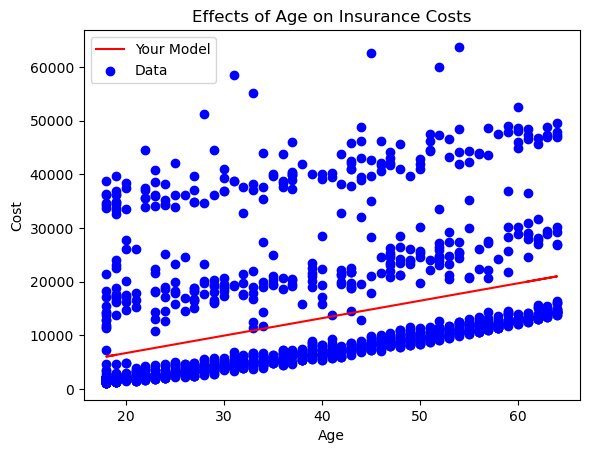

Weight: 325.1792438148059 Bias: 181.92698934097797


In [9]:
weight, bias = gradient_descent(x, y, 1, 0, 0.0005, 1000)
plot_graph(x, y, weight, bias)
print(f'Weight: {weight} Bias: {bias}')

From this you should be able to see how through using a gradient descent model a more accurate result can be provided given you tune the parameters. You should experiment with the epochs and learning rates to see how these effect your results. Tuning these values is a large part of ML and will be important to keep in mind for neural networks.

## **(Extension)** Stochastic Gradient Descent
If you have the time try to implement stochasic gradient descent. Stochastic gradient descent trains based upon a randomised batch of data, estimating the gradient rather than computing it. This can heavily reduce computational complexity at the cost of a lower convergance rate in some cases.